Comparing Robust Scaling With Z scaling 
To Prove Robust Scaling Performs better with outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Boxplot(N,L,title,Y_label):
    plt.figure(figsize=(18,6))
    plt.boxplot(N,tick_labels=L)
    plt.title(title)
    plt.ylabel(Y_label)
    plt.show()


In [3]:
# creating two datasets one with outliers and one normal using normal distribution
normal_data = np.random.normal(5,2,1001)
outliers_data = np.copy(normal_data)

In [4]:
# creating 10 outliers in the dataset
outliers_data[-10:] = np.random.normal(300,1,10)

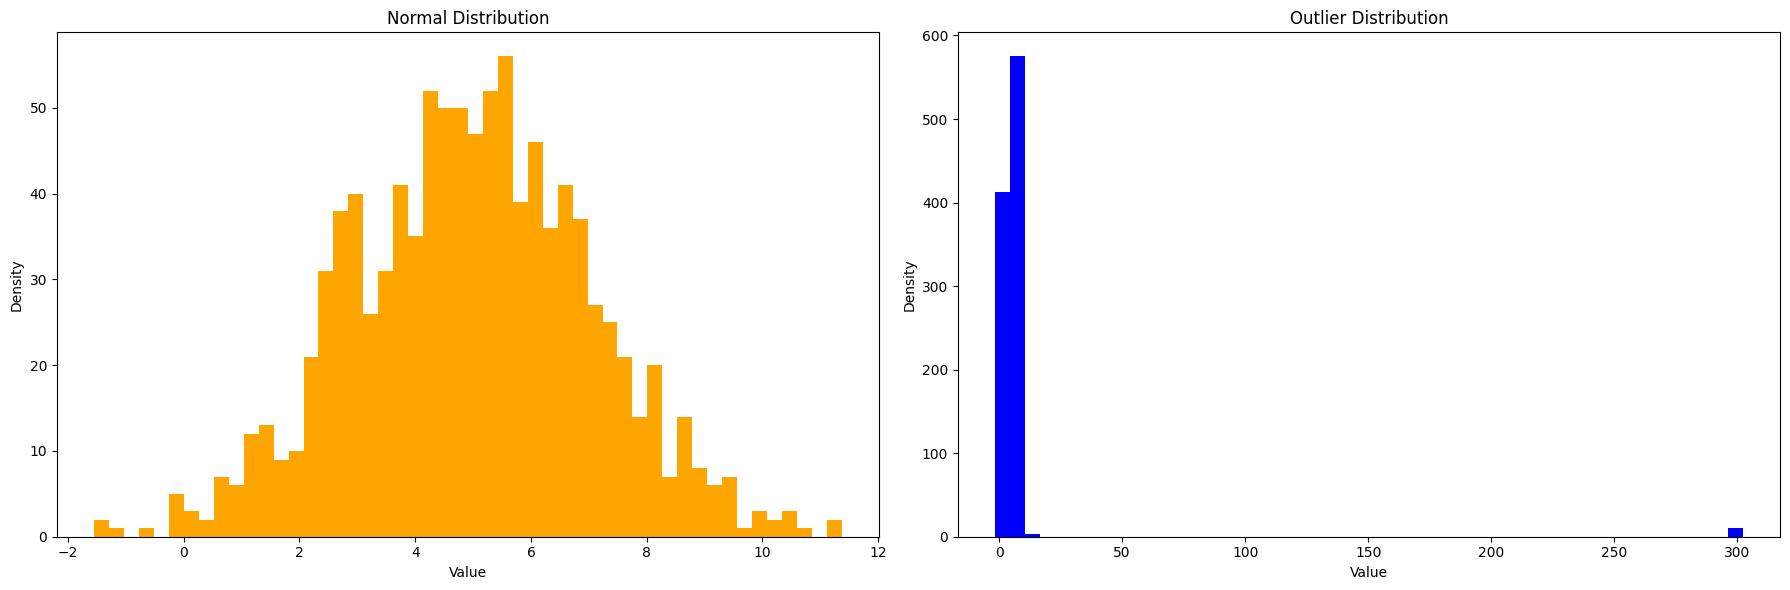

In [5]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(normal_data, bins=50, alpha=1, label='Normal Distribution', color='orange')
plt.xlabel('Value')
plt.title('Normal Distribution')
plt.ylabel('Density')

plt.subplot(1,2,2)
plt.hist(outliers_data, bins=50, alpha=1, label='Outlier Distribution', color='blue')
plt.xlabel('Value')
plt.title('Outlier Distribution')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


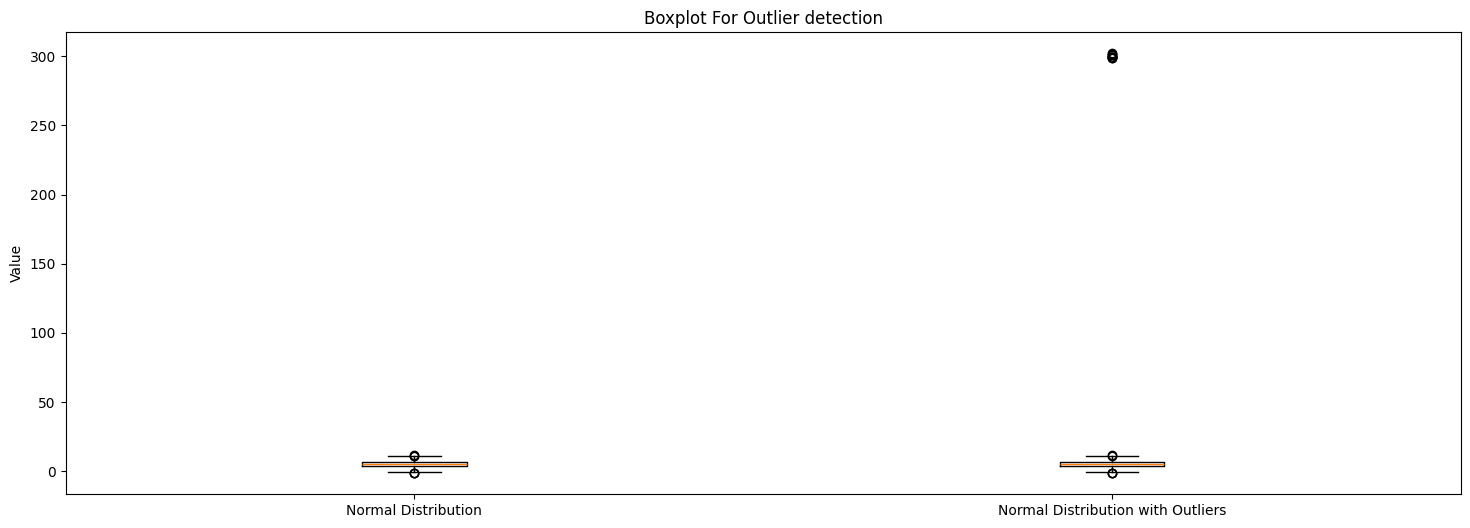

In [6]:
Boxplot([normal_data, outliers_data],['Normal Distribution', 'Normal Distribution with Outliers'],'Boxplot For Outlier detection','Value')

In [ ]:
normal_mean = np.mean(normal_data)
outliers_mean = np.mean(outliers_data)

print("Mean of Normal Distribution:", normal_mean)
print("Mean of Outlier Distribution:", outliers_mean)


normal_median = np.median(normal_data)
outliers_median = np.median(outliers_data)

print("Median of Normal Distribution:", normal_median)
print("Median of Outlier Distribution:", outliers_median)


normal_std = np.std(normal_data)
outliers_std = np.std(outliers_data)

print("Standard Deviation of Normal Distribution:", normal_std)
print("Standard Deviation of Outlier Distribution:", outliers_std)

# finding out quartile range
Q1 = np.percentile(normal_data, 25)
Q3 = np.percentile(normal_data, 75)
normal_IQR = Q3 - Q1
print("Inter Quartile Range of Normal Distribution:", normal_IQR)

Q1 = np.percentile(outliers_data, 25)
Q3 = np.percentile(outliers_data, 75)
outlier_IQR = Q3 - Q1
print("Inter Quartile Range of Outlier Distribution:", outlier_IQR)

Mean of Normal Distribution: 4.975104891354384
Mean of Outlier Distribution: 7.929375074277445
Median of Normal Distribution: 5.029003085793651
Median of Outlier Distribution: 5.054647770784271
Standard Deviation of Normal Distribution: 2.0686163100354475
Standard Deviation of Outlier Distribution: 29.408035576315953
Inter Quartile Range of Normal Distribution: 2.832295620852909
Inter Quartile Range of Outlier Distribution: 2.8652486210815504


From this we can see how much the mean is affected by some outliers while median barely does same goes with standard deviation and interquartilerange(IQR)              
robust scaling = (n - median)/IQR ,                                                                                                                                                                 z scaling = (n - mean)/standard_deviation . n = value of element

In [8]:
# applying z scaling on outliers data
z_scaled_data = (outliers_data - outliers_mean) / outliers_std

r_scaled_data = (outliers_data - outliers_median) / outlier_IQR

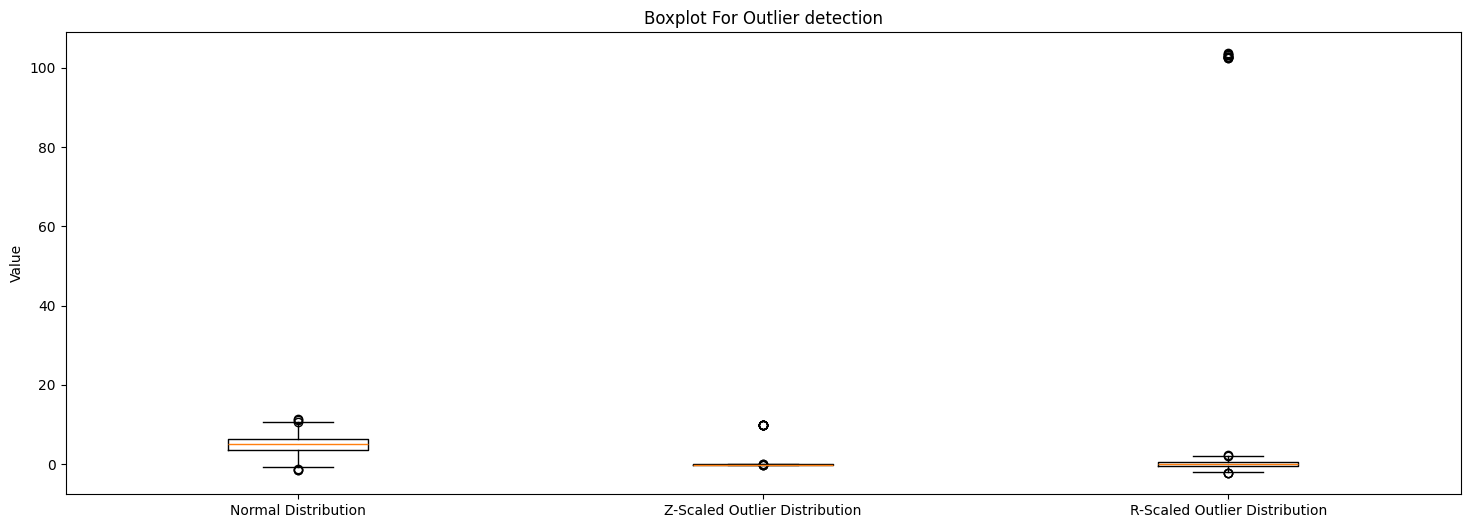

In [9]:
Boxplot([normal_data, z_scaled_data, r_scaled_data],['Normal Distribution', 'Z-Scaled Outlier Distribution', 'R-Scaled Outlier Distribution'],'Boxplot For Outlier detection','Value')

Effect of Outliers on other values in data

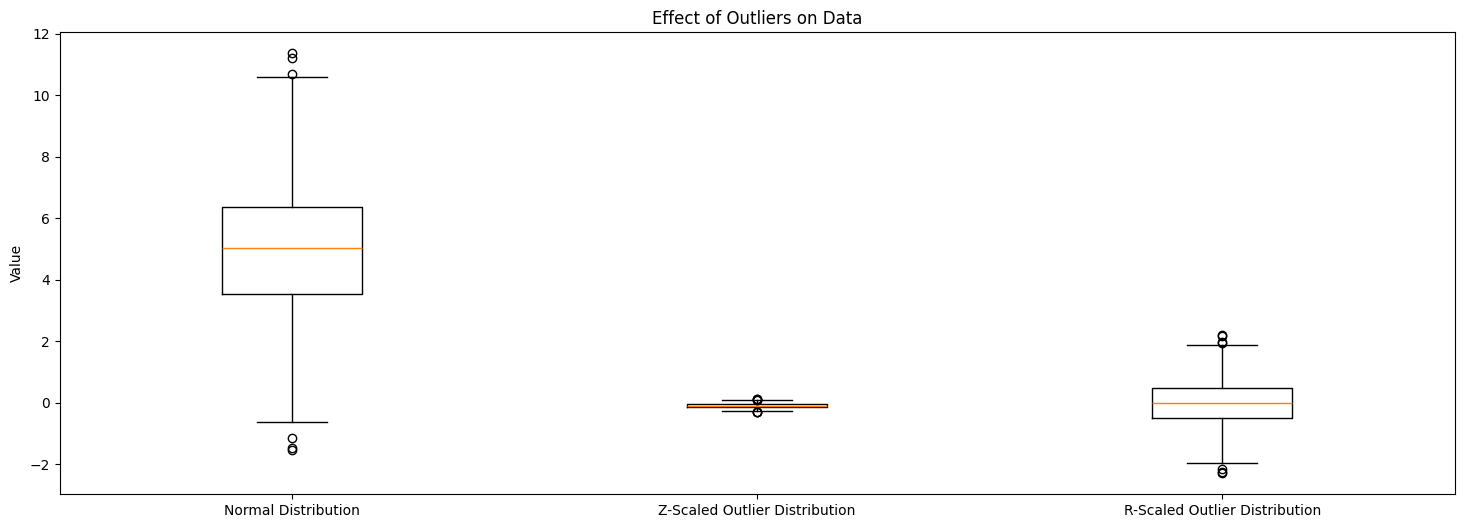

In [10]:
Boxplot([normal_data, z_scaled_data[:990], r_scaled_data[:990]],['Normal Distribution', 'Z-Scaled Outlier Distribution', 'R-Scaled Outlier Distribution'],'Effect of Outliers on Data','Value')

Here We can clearly see how Scaled down Z scaling is due to outliers while Robust scaling preserves the essence of the data

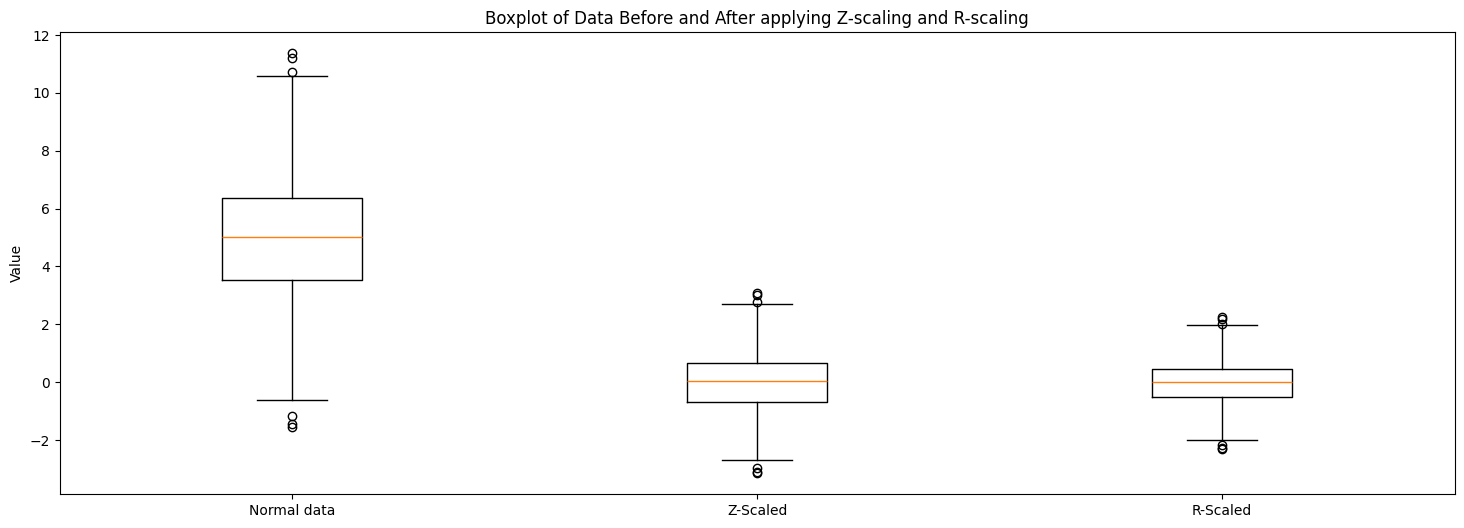

In [11]:
# scaling normal distribution values
normal_z_scaling = (normal_data- normal_mean)/normal_std
normal_r_scaling = (normal_data - normal_median)/normal_IQR

Boxplot([normal_data,normal_z_scaling,normal_r_scaling],["Normal data","Z-Scaled","R-Scaled"],"Boxplot of Data Before and After applying Z-scaling and R-scaling","Value")
 

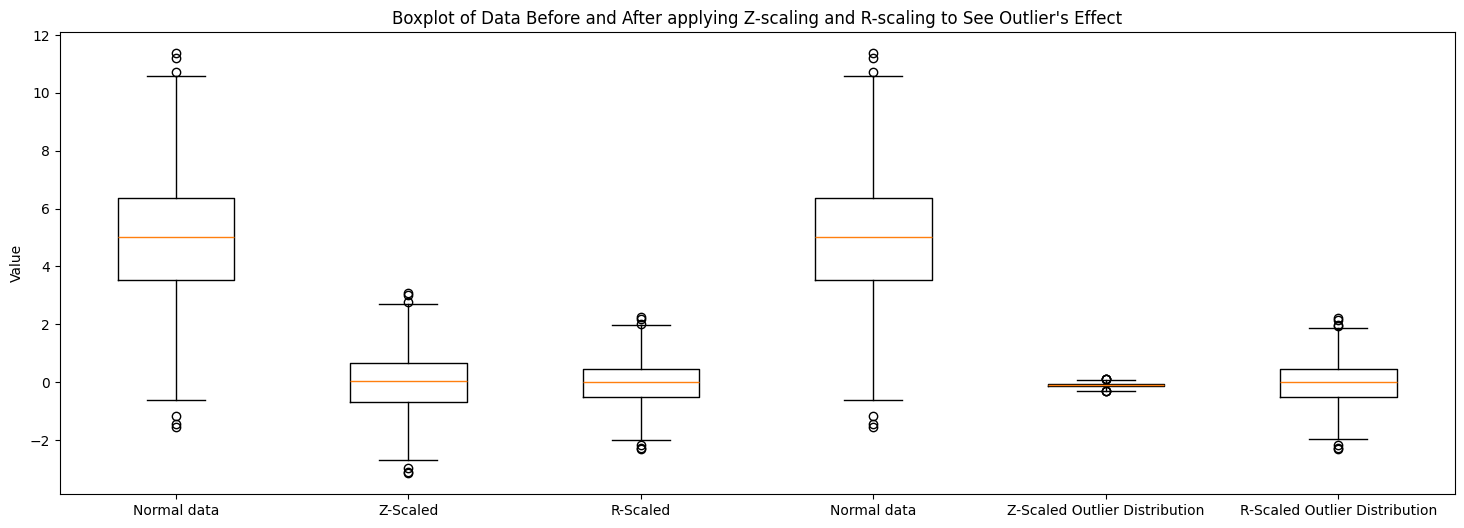

In [12]:
Boxplot([normal_data,normal_z_scaling,normal_r_scaling,normal_data, z_scaled_data[:990], r_scaled_data[:990]],["Normal data","Z-Scaled","R-Scaled",'Normal data', 'Z-Scaled Outlier Distribution', 'R-Scaled Outlier Distribution'],"Boxplot of Data Before and After applying Z-scaling and R-scaling to See Outlier's Effect","Value")